In [1]:
import pandas_profiling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


np.random.seed(546)

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style("dark")

APRESENTANDO A NOSSA BASE DE DADOS:

Nossa base de dados nos traz diagnósticos de câncer de mama no estado  do Wiscosin(EUA), nela podemos observar algumas características interessantes a partir das imagens digitalizadas de células extraídas de tecidos mamários pelo procedimento chamado PAAF. Assim, podemos nos aprofundar um pouco mais nas características dos núcleos celulares, e buscar entender quais são suas relações com células cancerígenas.

- ID trata-se do parâmetro de identificação
- Diagnosis trata-se do diagnóstico do tecido, sendo ele Benigno ou Maligno

Sufixos:

*_mean: Média padrão


*_se: Margem de erro


*_worst: Mais alto valor encontrado

---------- DETALHES-----------

Raio: 

- Oferece a noção da dimensão do tumor, isso é essencial para a cirurgia correr bem


Textura:

- Para visualização do tecido em questão e baseado na escala de cinza é utilizada para encontrar o tumor. 
(Associado à ultrassonografia)

In [2]:
#Criando nossa base de dados

bcdf = pd.read_csv('cancer_de_mama.csv')


## Criando uma cópia, caso seja necessário manter alguma das bases no estado original

bcdf_1 = bcdf.copy()

bcdf

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
bcdf.info()

##Obtendo informações da nossa base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
bcdf.isnull().sum()

## Observando a incidência de valores faltantes

## A coluna unnamed apresenta uma série de valores faltantes irrelevantes para as nossas análises

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
bcdf = bcdf.drop('Unnamed: 32', axis=1)

## Excluindo a coluna Unnamed:32

In [6]:
## Transformando variável categórica do diagnóstico em valores matemáticos
## No caso, os tecidos malignos são representados pelo número 1, e os benignos pelo número 0


bcdf['diagnosis'][bcdf['diagnosis']=='M'] = 1
bcdf['diagnosis'][bcdf['diagnosis']=='B'] = 0
bcdf['diagnosis'] = bcdf['diagnosis'].astype('int')

C:\Users\João Vitor\AppData\Local\Temp\ipykernel_8484\2001237218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcdf['diagnosis'][bcdf['diagnosis']=='M'] = 1
C:\Users\João Vitor\AppData\Local\Temp\ipykernel_8484\2001237218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcdf['diagnosis'][bcdf['diagnosis']=='B'] = 0


In [7]:
bcdf['diagnosis'].value_counts()

## Verificando a incidência de possíveis tumores

0    357
1    212
Name: diagnosis, dtype: int64

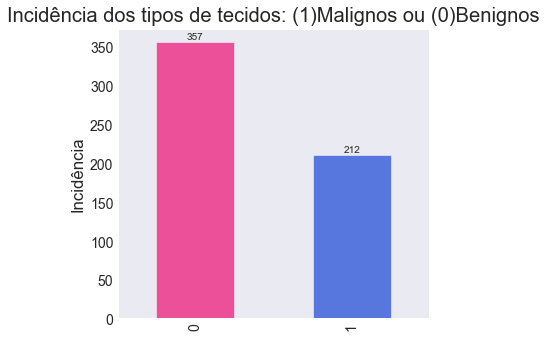

In [8]:
## Criando um gráfico para melhor visualização das incidências

fig_1 = bcdf['diagnosis'].value_counts().plot(kind='bar', figsize = (5,5), color = ('#EB5098', '#5776DE'))

for x in fig_1.containers:
    fig_1.bar_label(x, label_type='edge', fontsize = 10)

plt.title('Incidência dos tipos de tecidos: (1)Malignos ou (0)Benignos')
plt.ylabel('Incidência')

plt.show()

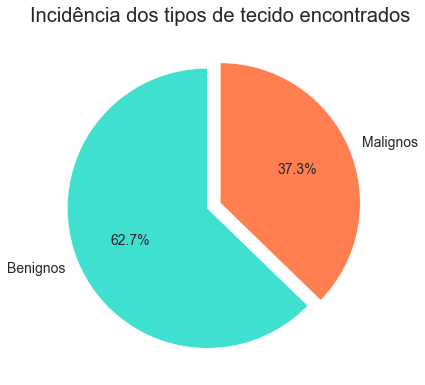

In [9]:
## Observando a porcentagem para termos uma noção ainda mais 
## clara sobre a incidência de células malignas e benignas

label = ['Benignos', 'Malignos']
sizes = bcdf['diagnosis'].value_counts()
colors = ['turquoise', 'coral']

### 

figure, x1 = plt.subplots(figsize=(6,6))

x1.pie(sizes, colors = colors, labels=label, autopct= '%1.1f%%', explode= (0.1, 0.0),  startangle=90)

########

plt.title('Incidência dos tipos de tecido encontrados')
plt.show()

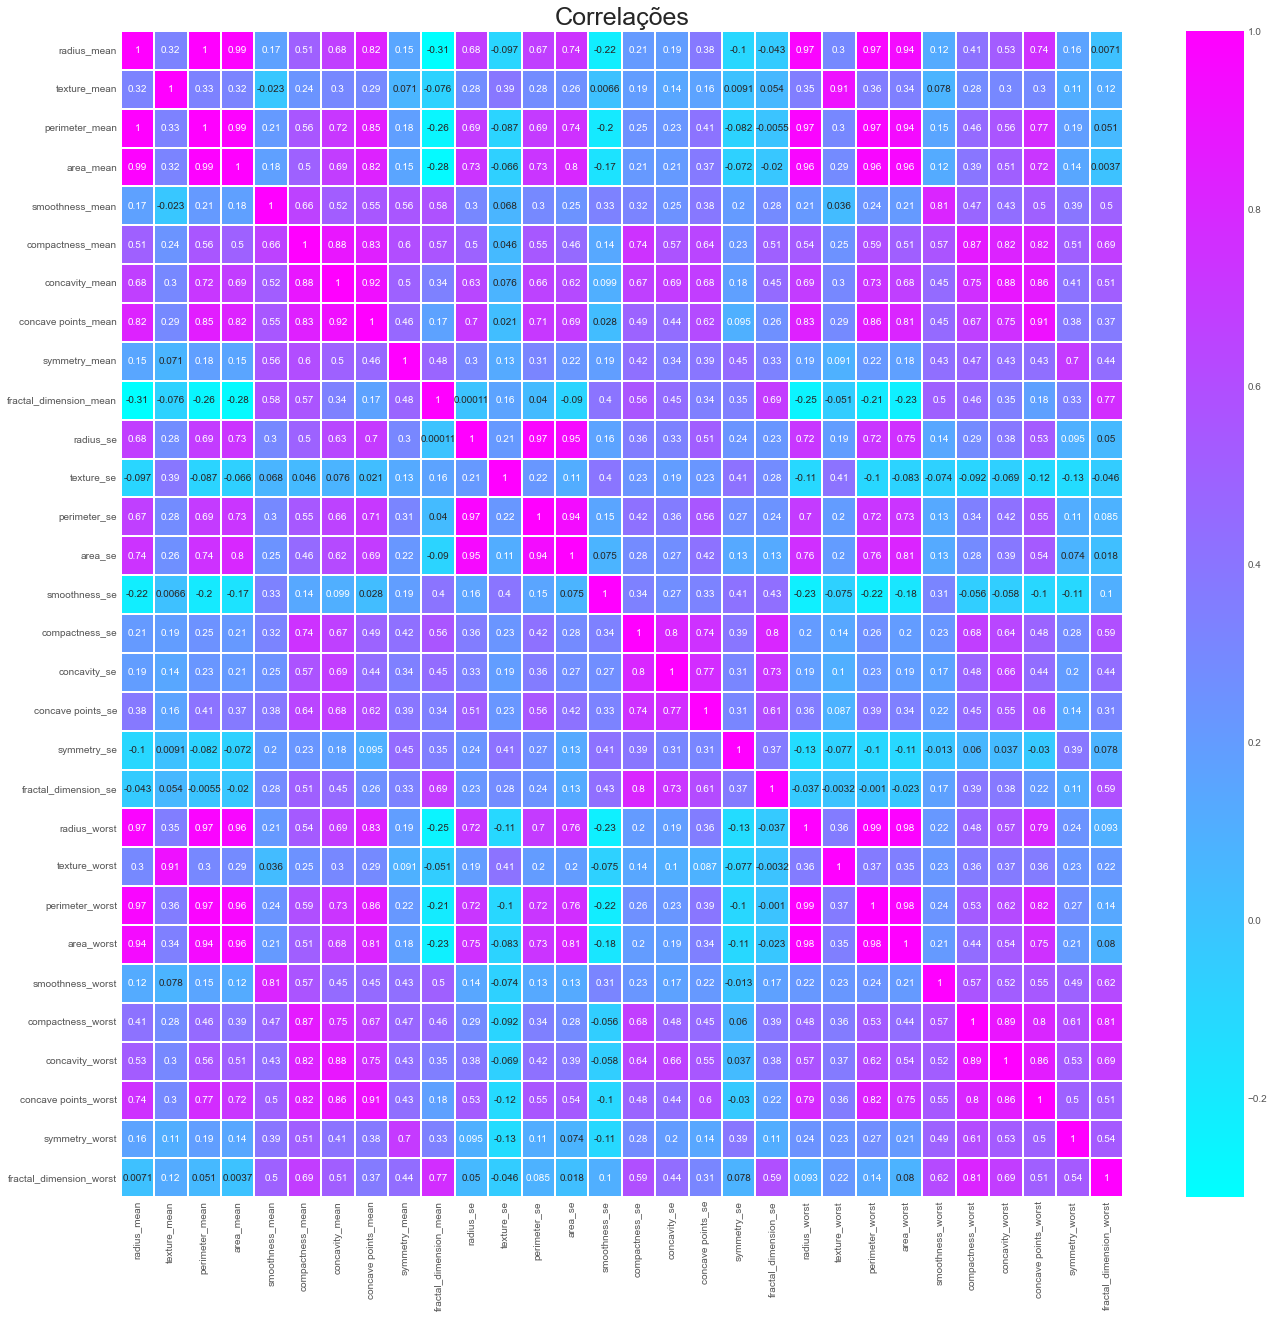

In [10]:
### Estabelecendo correlações entre as colunas de TODO dataset

bcdf_0 = bcdf.drop('id',axis=1)  ##removendo as identificações de usuários
bcdf_0 = bcdf_0.drop('diagnosis',axis=1)
 


plt.style.use('ggplot')
plt.subplots(figsize = (20,20))

heat_map_1 = sns.heatmap(bcdf_0.corr(), annot= True, cmap = 'cool', linewidths=.10)

plt.title('Correlações', fontsize = 25)
plt.show()

ESTUDOS CONTENDO APENAS OS VALORES MÉDIOS.

OBS: IMPORTANTE! Embora nesse momento estejamos dedicados ao estudo dos valores médios, ainda sim é importante ressalter que: para conseguirmos fazer uma predição de excelência, é necessário utilizarmos os desvios e valores maiores.

In [11]:
## Criando uma base de dados com os valores médios

mean_val = bcdf[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].copy()

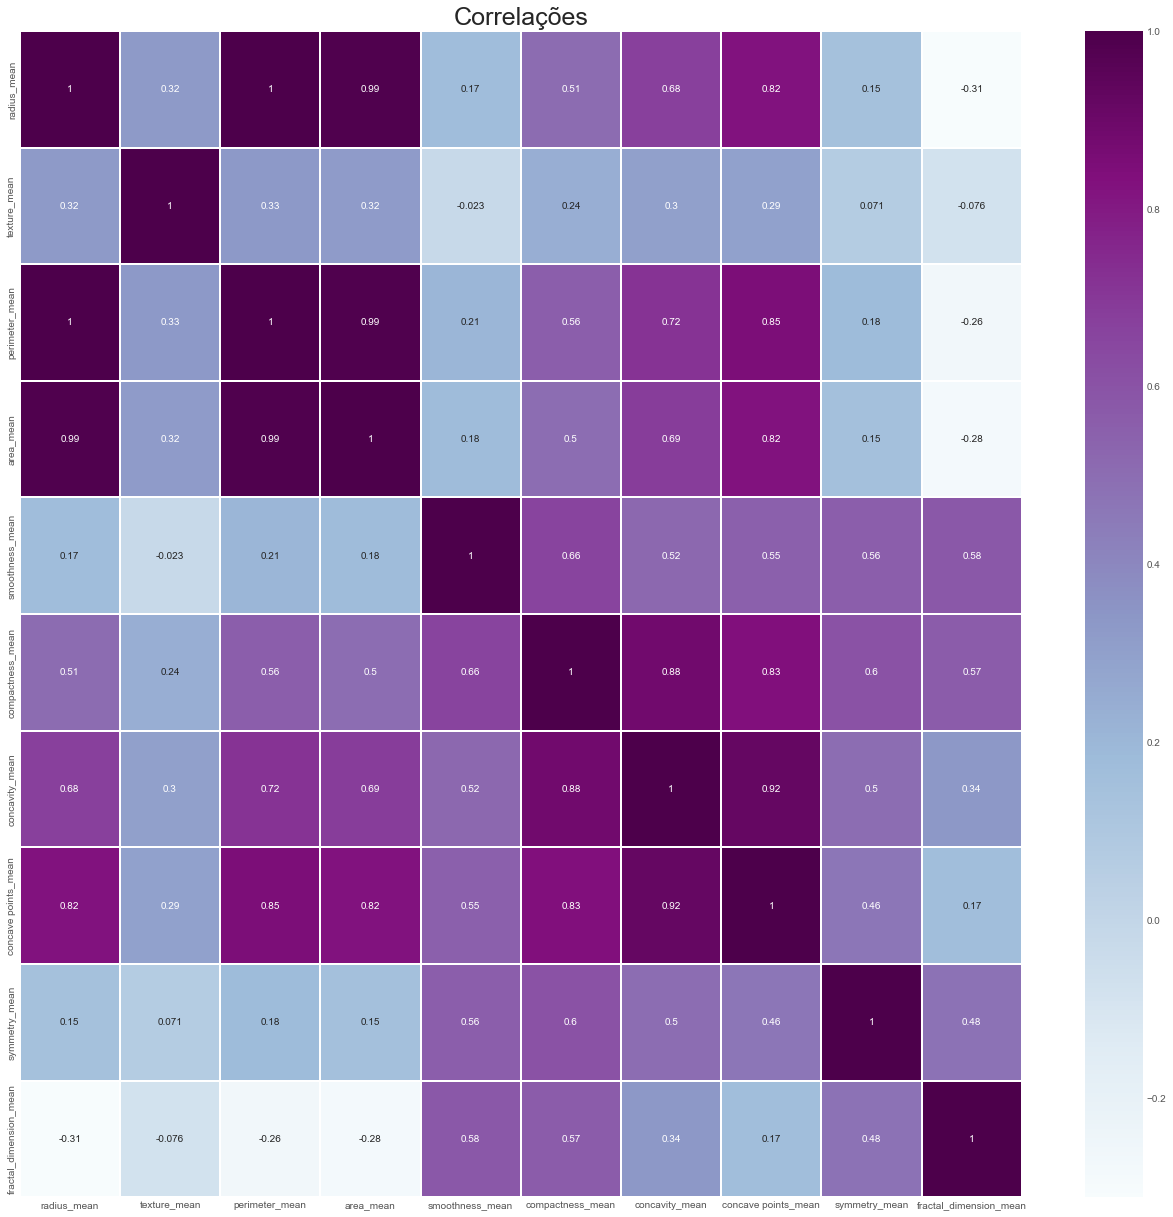

In [12]:
##Novamente as correlações entre as colunas e os valores médios, dessa vez excluindo a coluna "ID", por ser irrelevante

mean_val_1 = mean_val.drop('id',axis=1)
mean_val_1 = mean_val_1.drop('diagnosis',axis=1)

plt.style.use('ggplot')
plt.subplots(figsize = (20,20))

heat_map_2 = sns.heatmap(mean_val_1.corr(), annot= True, cmap = 'BuPu', linewidths=.10)

plt.title('Correlações', fontsize = 25)
plt.show()

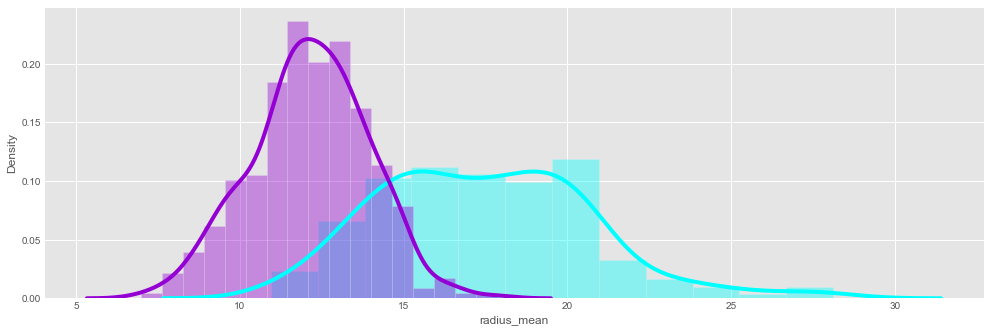

In [13]:
import warnings
warnings.filterwarnings('ignore')



plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].radius_mean , color = 'aqua') ## Média dos raios tumor maligno
sns.distplot(bcdf[bcdf['diagnosis']==0].radius_mean , color = 'darkviolet') ## benignos


plt.show()

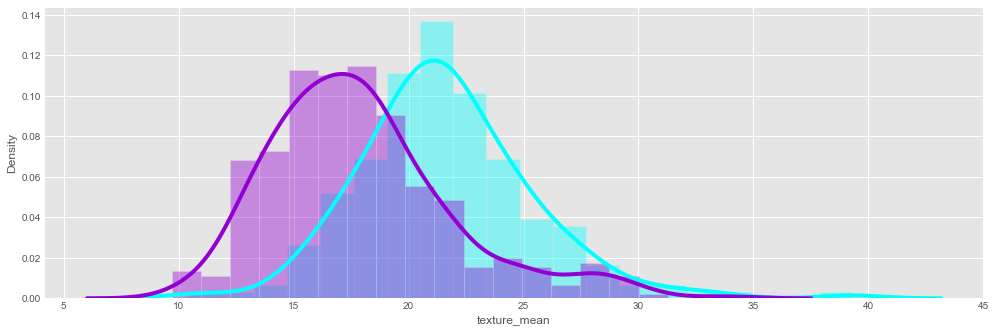

In [14]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].texture_mean , color = 'aqua') ## tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].texture_mean , color = 'darkviolet') ## benignos


plt.show()

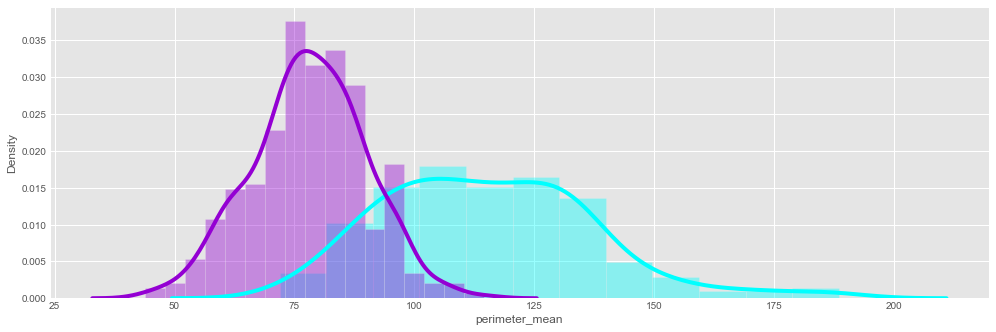

In [15]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].perimeter_mean , color = 'aqua') ##  tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].perimeter_mean , color = 'darkviolet') ## benignos


plt.show()

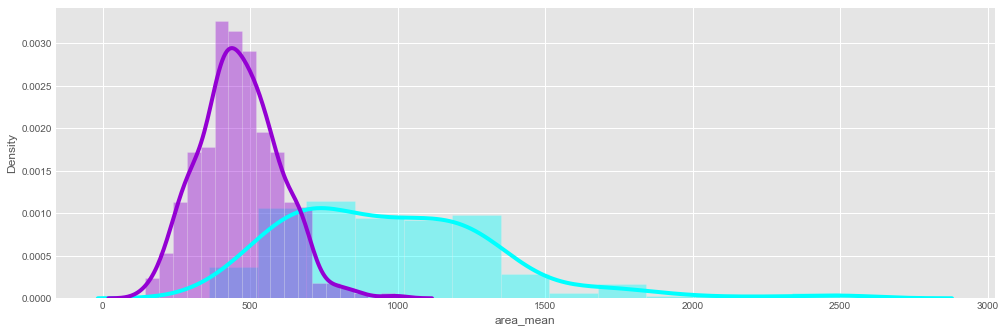

In [16]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].area_mean , color = 'aqua') ##  tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].area_mean , color = 'darkviolet') ## benignos


plt.show()

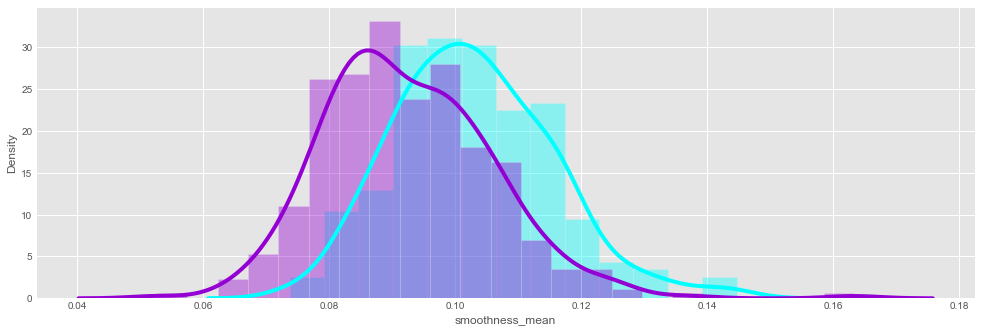

In [17]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].smoothness_mean , color = 'aqua') ##  tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].smoothness_mean , color = 'darkviolet') ## benignos


plt.show()

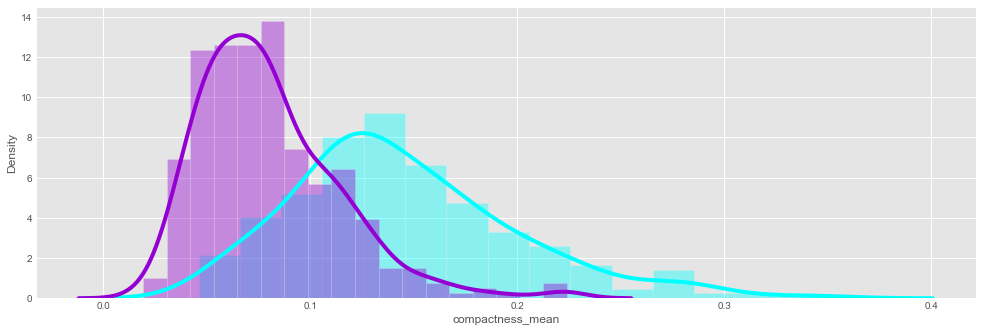

In [18]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].compactness_mean , color = 'aqua') ## tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].compactness_mean , color = 'darkviolet') ## benignos


plt.show()

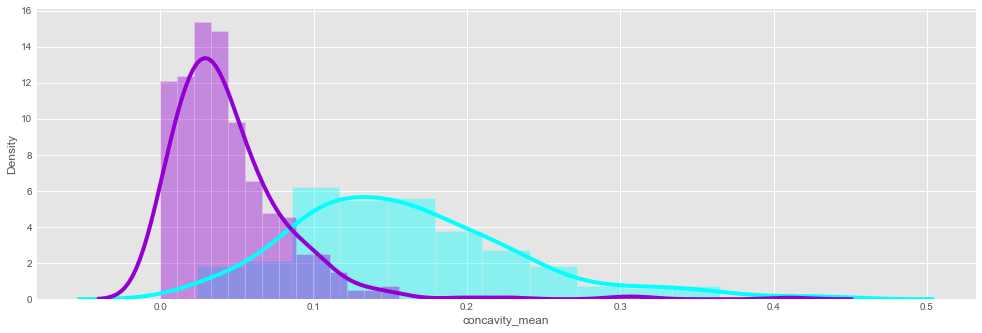

In [19]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].concavity_mean , color = 'aqua') ## tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].concavity_mean , color = 'darkviolet') ## benignos


plt.show()

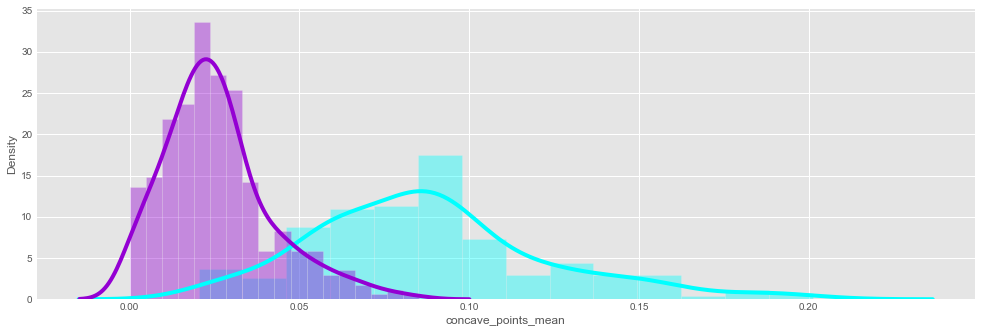

In [20]:
bcdf.rename(columns={'concave points_mean':'concave_points_mean'},inplace=True)
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].concave_points_mean , color = 'aqua')  ## tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].concave_points_mean , color = 'darkviolet')  ## benignos


plt.show()

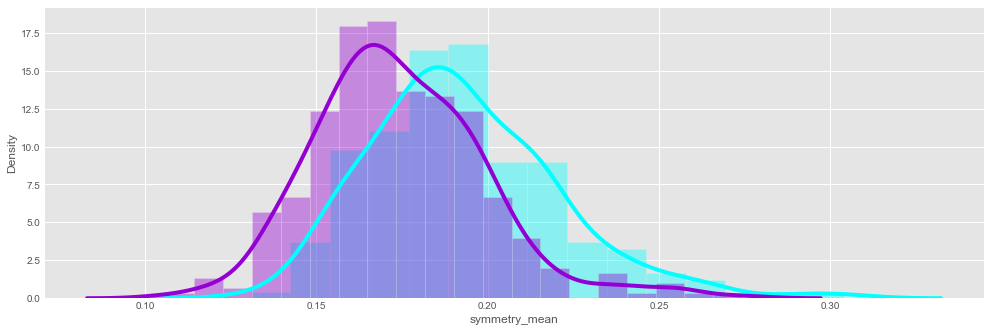

In [21]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].symmetry_mean , color = 'aqua')  ## tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].symmetry_mean , color = 'darkviolet')  ## benignos


plt.show()

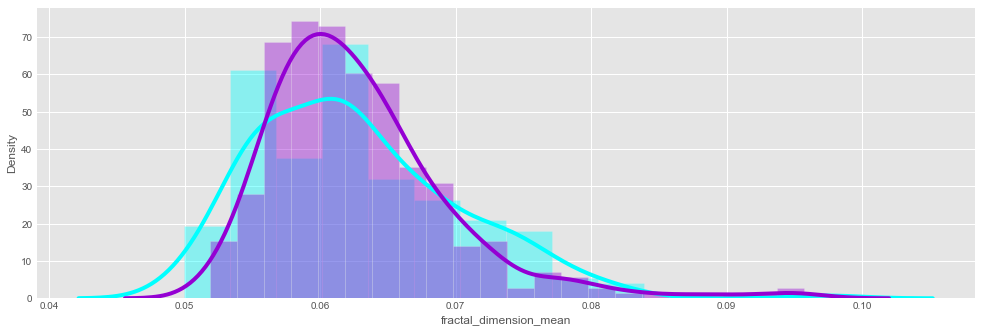

In [22]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(bcdf[bcdf['diagnosis']==1].fractal_dimension_mean , color = 'aqua')  ## tumores malignos
sns.distplot(bcdf[bcdf['diagnosis']==0].fractal_dimension_mean , color = 'darkviolet')  ## benignos


plt.show()